In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#Creating a small dataframe

df = pd.DataFrame({ 'x' : [1,3,4,7,6,5,10,19,17,25,23,15,13],
                    'y' : [4,6,9,8,9,7,11,15,15,20,15,16,12]})

In [16]:
df

,x,y
0,1,4
1,3,6
2,4,9
3,7,8
4,6,9
5,5,7
6,10,11
7,19,15
8,17,15
9,25,20


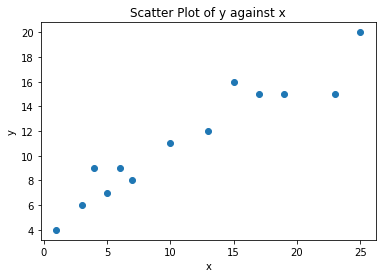

In [17]:
plt.scatter(df['x'],df['y'])
plt.title('Scatter Plot of y against x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Simple Implementation

Reference: Brownlee,J.(2016,Oct 26).How To Implement Simple Linear Regression From Scratch With Python. Retrieved from: https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/

To implement a simple linear regression, steps are:

1) Calculate Mean and Variance.

2) Calculate Covariance.

3) Estimate Coefficients.

4) Make Predictions.


In [18]:
#1) Calculate Mean and Variance
meandf = df.mean()
    


In [19]:
meandf

x    11.384615
y    11.307692
dtype: float64

In [20]:
variance = df.var()

In [21]:
variance

x    62.423077
y    21.730769
dtype: float64

2) Calculate Covariance
<img src = "https://cdn1.byjus.com/wp-content/uploads/2019/02/Covariance-Formula.png"> 

In [22]:
#Covariance formula =>  covariance = (sum((x(i) - mean(x)) * (y(i) - mean(y))))/N-1
def covariance(x,mean_x,y,mean_y):
    covar = 0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/(len(x)-1)

In [23]:
covar = covariance(df['x'],meandf[0],df['y'],meandf[1])
print(covar)

35.03846153846154


In [24]:
#Another way to calculate covariance matrix
#The upwards diagonals represent the covariance while the downwards diagonals represent the x and y variance
np.cov(df['x'],df['y'])

array([[62.42307692, 35.03846154],
       [35.03846154, 21.73076923]])

In [25]:
#3) Estimate coeeficients
#B0(Intercept) and B1(Slope)

#B0/Intercept can be estimated using => B0 = mean(y) - B1 * mean(x)

#B1/Slope can be estimated using => B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 ) 
#or                                 B1 = covariance(x, y) / variance(x)

b1 = covar/variance[0]
b0 = meandf[1] - b1*meandf[0]
    

In [26]:
print("Coefficients: b0 = %.3f, b1 = %.3f" % (b0,b1))

Coefficients: b0 = 4.917, b1 = 0.561


Text(0, 0.5, 'y')

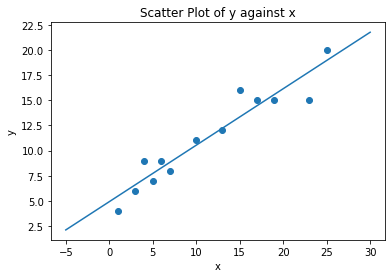

In [27]:
x = np.linspace(-5,30,100)
y = b0 + b1*x
plt.plot(x,y)
plt.scatter(df['x'],df['y'])
plt.title('Scatter Plot of y against x')
plt.xlabel('x')
plt.ylabel('y')

In [28]:
#4) Make predictions
predict = b0 + b1*(0)
predict

4.917436845348121

# Least Squares Technique (similar to previous)

Reference: Linear Regression (Python Implementation). (n.d.). Retrieved from: https://www.geeksforgeeks.org/linear-regression-python-implementation/

<img src = "Screenshot (9).png">

<img src = "Screenshot (12).png">

In [39]:
def estimate_coefficients(x,y):
    if len(x) != len(y):
        return False
    n = len(x)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    SS_xy = np.sum(x*y) - n*mean_x*mean_y
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
    
    b1 = SS_xy/SS_xx
    b0 = mean_y - b1*mean_x
    return(b0,b1)

In [40]:
result = estimate_coefficients(df['x'],df['y'])
print(result)

(4.9174368453481225, 0.561306223043746)


In [41]:
def plot_regression_line(x, y, b): 
	# plotting the actual points as scatter plot 
	plt.scatter(x, y, color = "m", 
			marker = "o", s = 30) 

	# predicted response vector 
	y_pred = b[0] + b[1]*x 

	# plotting the regression line 
	plt.plot(x, y_pred, color = "g") 

	# putting labels 
	plt.xlabel('x') 
	plt.ylabel('y') 

	# function to show plot 
	plt.show() 

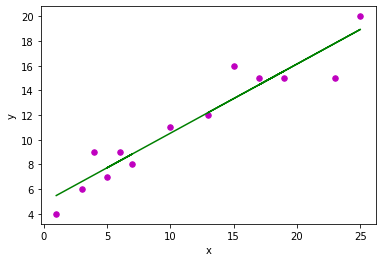

In [42]:
plot_regression_line(df['x'],df['y'],result)

Text(0, 0.5, 'y')

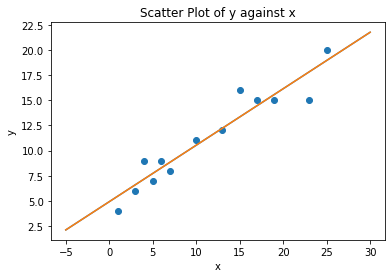

In [44]:
x = np.linspace(-5,30,100)
y = b0 + b1*x
plt.plot(x,y)
y = result[0] + result[1]*x
plt.plot(x,y)
plt.scatter(df['x'],df['y'])
plt.title('Scatter Plot of y against x')
plt.xlabel('x')
plt.ylabel('y')